**Import necessary libraries**

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

**Load dataset**

In [86]:
df = pd.read_csv('glassdoor_jobs.csv')

**Display initial data insights**

In [87]:
df.head()


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [88]:
df.tail()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom
955,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1


In [89]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [90]:
df.shape

(956, 15)

In [91]:
df.isnull().sum()

,0
Unnamed: 0,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [93]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,956.0,NaN,NaN,NaN,477.5,276.117729,0.0,238.75,477.5,716.25,955.0
Job Title,956,328,Data Scientist,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary Estimate,956,417,-1,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Description,956,596,Data Engineer with R\n\n-Contract Role in Atla...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,956.0,NaN,NaN,NaN,3.601255,1.067619,-1.0,3.3,3.8,4.2,5.0
Company Name,956,448,Takeda Pharmaceuticals\n3.7,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,956,237,"New York, NY",78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Headquarters,956,235,"New York, NY",75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,956,9,1001 to 5000 employees,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,956.0,NaN,NaN,NaN,1774.605649,598.942517,-1.0,1937.0,1992.0,2008.0,2019.0


**Remove rows without salary estimates**

In [94]:
df = df[df['Salary Estimate'] != '-1']

**Add salary type indicators**

In [95]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

**Clean salary text and extract min, max, avg salaries**

In [96]:
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
salary = salary.str.replace('K', '', regex=False).str.replace('$', '', regex=False)
salary = salary.str.lower().str.replace('per hour', '', regex=False).str.replace('employer provided salary:', '', regex=False)


**Split salary into min and max**

In [97]:
salary = salary.str.strip()
df['min_salary'] = salary.apply(lambda x: int(x.split('-')[0].strip()))
df['max_salary'] = salary.apply(lambda x: int(x.split('-')[1].strip()))
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

**Simplify job titles**

In [98]:
def simplify_title(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'machine learning' in title:
        return 'ML Engineer'
    elif 'manager' in title:
        return 'Manager'
    elif 'director' in title:
        return 'Director'
    elif 'software' in title or 'developer' in title:
        return 'Software Engineer'
    else:
        return 'Other'
df['job_simplified'] = df['Job Title'].apply(simplify_title)

**Identify seniority**

In [99]:
def seniority(title):
    title = title.lower()
    if 'senior' in title:
        return 'Senior'
    elif 'junior' in title or 'jr' in title:
        return 'Junior'
    elif 'lead' in title:
        return 'Lead'
    elif 'principal' in title:
        return 'Principal'
    else:
        return 'Not Specified'
df['seniority'] = df['Job Title'].apply(seniority)

**Company age calculation**

In [100]:
df['company_age'] = 2024 - df['Founded']

**Check if job location is same as HQ**

In [101]:
df['same_state_as_hq'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

**Revenue category simplification**

In [102]:
def simplify_revenue(revenue):
    rev = str(revenue).lower()
    if 'billion' in rev:
        return 'Large'
    elif 'million' in rev:
        return 'Medium'
    elif 'less than' in rev or 'unknown' in rev:
        return 'Small'
    else:
        return 'Unknown'
df['revenue_category'] = df['Revenue'].apply(simplify_revenue)

**Length of job description**

In [103]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(str(x)))

**Number of competitors**

In [104]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(str(x).split(',')) if x != '-1' and pd.notnull(x) else 0)


**Replace unknown ownership types**

In [105]:
df['ownership_type'] = df['Type of ownership'].replace('-1', 'Unknown')


**Extract job state from location**

In [106]:
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())


**Visualizations**

<ipython-input-107-e1fd555f69c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job_simplified', y='avg_salary', data=df, palette='Set3')


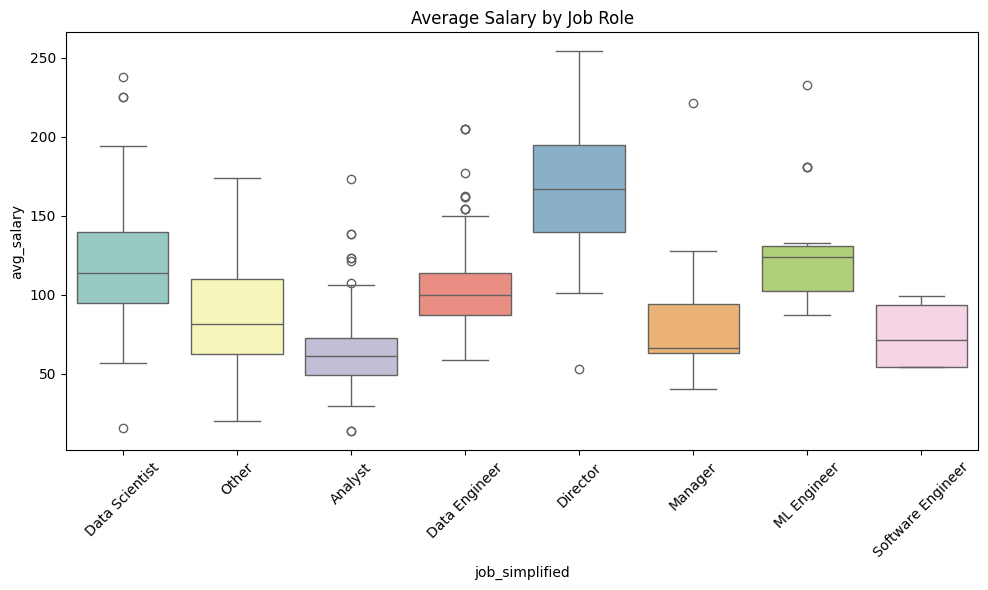

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_simplified', y='avg_salary', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title("Average Salary by Job Role")
plt.tight_layout()
plt.show()

<ipython-input-108-c6d3044f051c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seniority', y='avg_salary', data=df, palette='coolwarm')


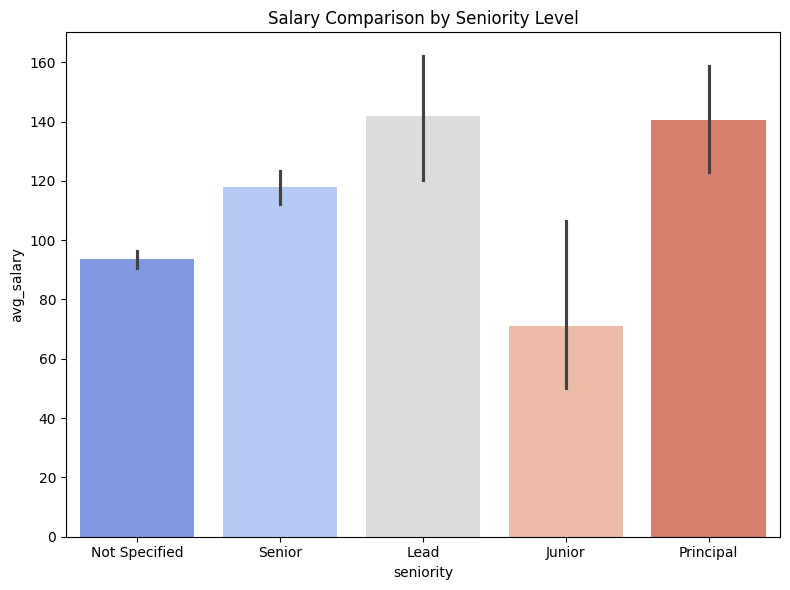

In [108]:
plt.figure(figsize=(8, 6))
sns.barplot(x='seniority', y='avg_salary', data=df, palette='coolwarm')
plt.title("Salary Comparison by Seniority Level")
plt.tight_layout()
plt.show()


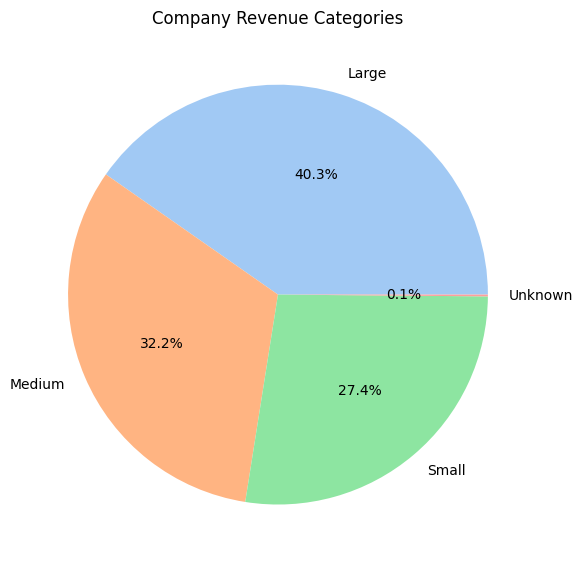

In [117]:
plt.figure(figsize=(6, 6))
df['revenue_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Company Revenue Categories")
plt.ylabel('')
plt.tight_layout()
plt.show()

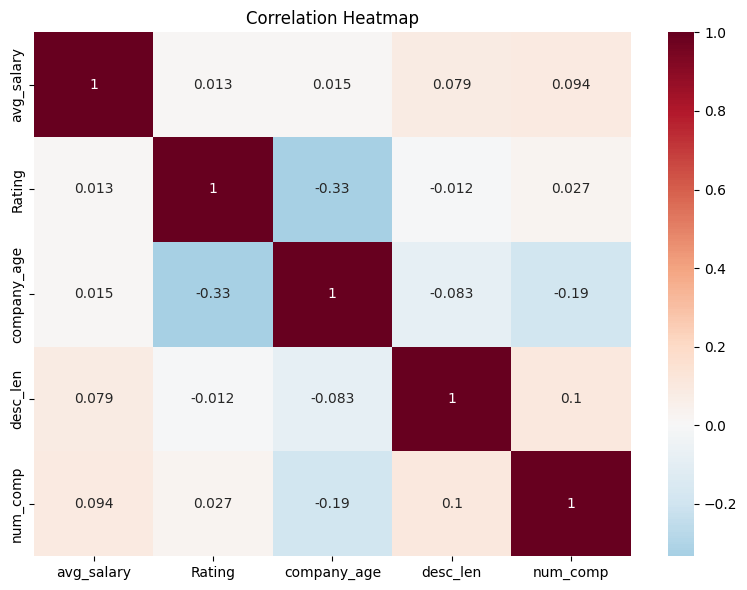

In [109]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['avg_salary', 'Rating', 'company_age', 'desc_len', 'num_comp']].corr(), annot=True, cmap='RdBu_r', center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

<ipython-input-111-de29d7d4382b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_state', data=df, order=df['job_state'].value_counts().index, palette='magma')


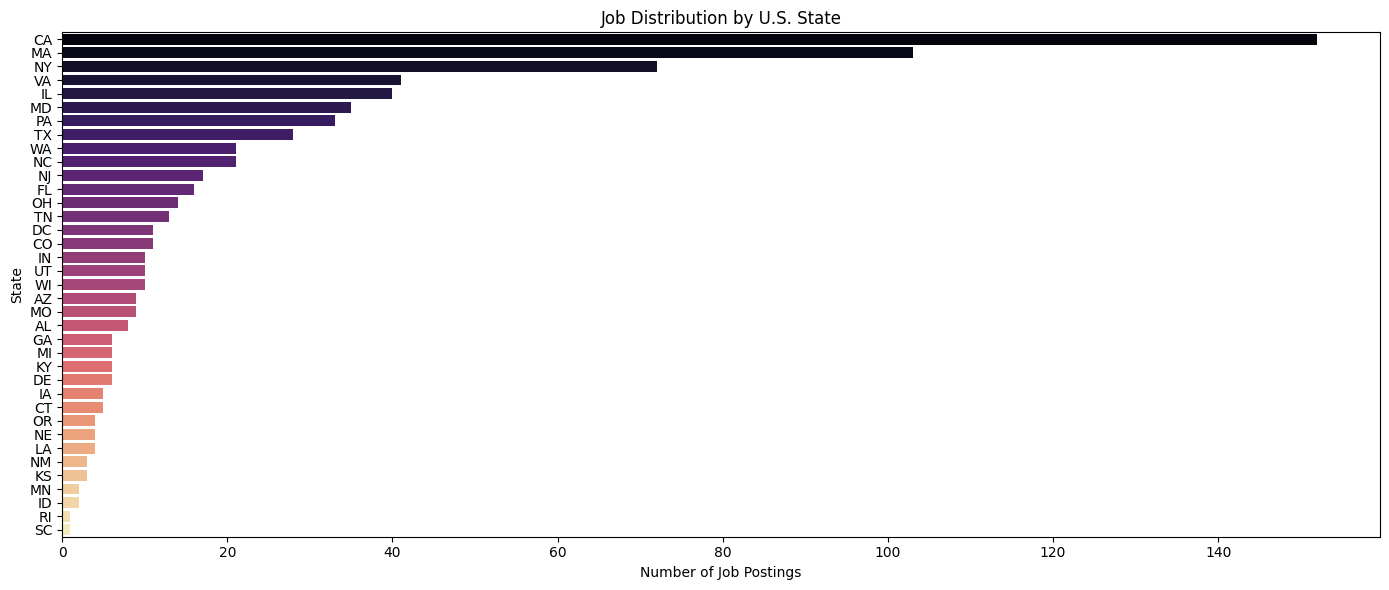

In [111]:
plt.figure(figsize=(14, 6))
sns.countplot(y='job_state', data=df, order=df['job_state'].value_counts().index, palette='magma')
plt.title("Job Distribution by U.S. State")
plt.xlabel("Number of Job Postings")
plt.ylabel("State")
plt.tight_layout()
plt.show()

**Model Building**

In [112]:
features = ['avg_salary', 'Rating', 'company_age', 'desc_len', 'num_comp',
            'job_simplified', 'seniority', 'revenue_category', 'ownership_type', 'job_state']
df_model = df[features]

**One-hot encoding for categorical variables**

In [113]:
df_model = pd.get_dummies(df_model, drop_first=True)

**Splitting dataset**

In [114]:
X = df_model.drop('avg_salary', axis=1)
y = df_model['avg_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest Regression Model**

In [115]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

**Model Evaluation**

In [116]:
print("\n Model Evaluation")
print("R² Score:", round(r2_score(y_test, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))


 Model Evaluation
R² Score: 0.762
RMSE: 19.73
MAE: 12.57
